In [1]:
%autosave 0

Autosave disabled


In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from pydataset import data

In [3]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


Null: Size 2 parties tip the same amount as any party in my dataset.

Alternative: Size 2 parties tip a different amount from any party in my dataset.

This will be a 1-sample, 2-tailed t-test!

In [4]:
#define population mean
overall_tip = df.tip.mean()

In [23]:
#define sample distribution
tip_for_two = df[df['size'] == 2].tip
tip_for_two.head()

1     1.01
4     3.31
7     2.00
9     1.96
10    3.23
Name: tip, dtype: float64

In [10]:
t_two, p_two = stats.ttest_1samp(tip_for_two, overall_tip)
t_two, p_two

(-5.271912239283316, 4.4632473980137726e-07)

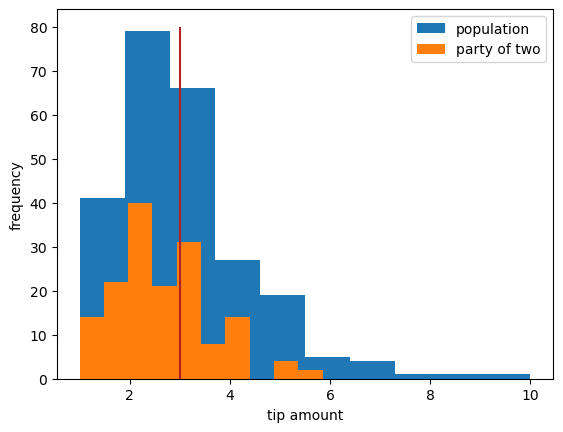

In [21]:
plt.hist(df.tip, label = 'population')
plt.hist(tip_for_two, label = 'party of two')
plt.vlines(overall_tip, 0, 80, color = 'firebrick')
plt.xlabel('tip amount')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [22]:
a = 0.05

if p_two < a:
    
    print('We reject the null hypothesis.')
    
else:
    
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


Null hypothesis: Guests for dinner pay less than or the same amount as guests for lunch.

Alternative hypothesis: Guests for dinner pay more than guests for lunch.

This will be a 2-sample, 1-tailed t-test.

In [28]:
lunch_bills = df[df.time == 'Lunch'].total_bill

In [29]:
dinner_bills = df[df.time == 'Dinner'].total_bill

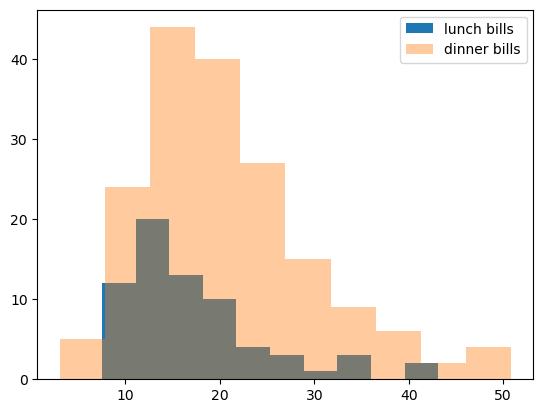

In [32]:
plt.hist(lunch_bills, label = 'lunch bills')
plt.hist(dinner_bills, label = 'dinner bills', alpha = 0.4)
plt.legend()
plt.show()

In [33]:
t_time, p_time = stats.ttest_ind(dinner_bills, lunch_bills)
t_time, p_time

(2.8976375218366424, 0.004104621407595676)

In [34]:
a = 0.05

if (t_time > 0) and (p_time / 2 < a):
    
    print('We reject the null hypothesis.')
    
else:
    
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.
